## Implementation of the k-means algorithm from scratch in numpy

### In this notebook, you will learn to: 
* Implement yourself the k-means algorithm by creating a Kmeans class
* Run the k-means algorithm on a toy dataset and visualize the different clusters 
* See the impact of centroids initialization on the final clusters given by the k-means algorithm (convergence to a local optimum

In [1]:
import numpy as np
from numpy.linalg import norm

In [7]:
class Kmeans:
    '''Implementing the k-means algorithm from scratch with numpy'''
    
    def __init__(self, n_clusters, max_iter=100, random_state=123):
        # parameters of the algorithms
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initialize_centroids(self, X):
        # TO DO
        # initialization step: assign random data points from X as centers of the initial clusters
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_distance(self, X, centroids):
        # TO DO
        # compute distance for every datapoint of the dataset X to all the current's clusters centroid. 
        # returns a np array of shape (number of datapoints, number of clusters)
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        # TO DO
        # return the cluster corresponding to the minimum of the distance vector. 
        return np.argmin(distance, axis=1)
    
    def compute_centroids(self, X, labels):
        # TO DO
        # compute the centroid of each clusters given the dataset X, 
        # and its cuurent assigned clusters (labels variables)
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_sse(self, X, labels, centroids):
        # TO DO
        # Compute the sum of the squared distance between data points and all centroids
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        # TO DO
        # Run the k-means algorithm using the functions of the
        # 0. initialize the centroids. 
        # 1. Do a for loop over the number of iterations
        # 2. Inside the loop:
            # a. compute the distance vector to the current centroids for the whole dataset
            # b. Assign clusters (labels variable) given the distance vector
            # c. compute the the new centroids given the labels
        # 3. Break the iteration loop when all the clusters'centroids are not moving anymore. 
        # 4. Compute the sum of squared error given the latest labels and centroids. 
        self.centroids = self.initialize_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
       
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        # TO DO
        # compute the distance vector for the dataset given the current centroids
        # return the closet cluster given this distance. 
        distance = self.compute_distance(X, old_centroids)
        return self.find_closest_cluster(distance)

In [8]:
# Import
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

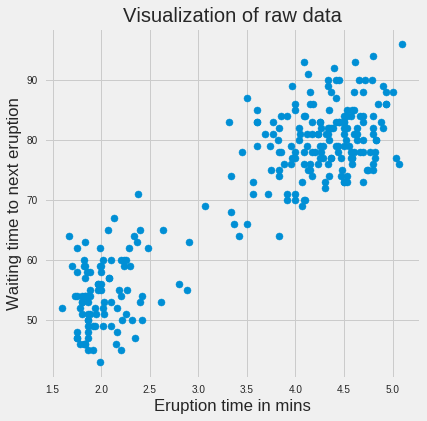

In [9]:
# Import the data
df = pd.read_csv('../data/old_faithful.csv')

# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data');

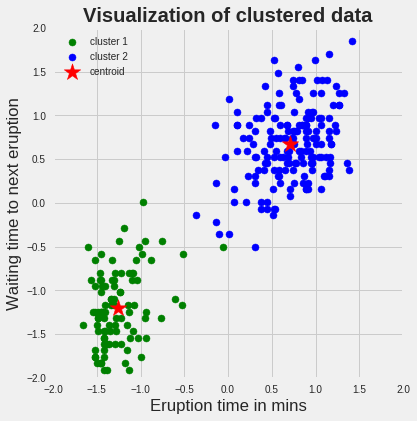

In [10]:
# Standardize the data
X_std = StandardScaler().fit_transform(df)

# TO DO: Run local implementation of kmeans
# Create the KMeans class
# Call the funtion fit with the X_std variable
# compute the centroids
km = Kmeans(n_clusters=2, max_iter=100)
km.fit(X_std)
centroids = km.centroids

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

The above graph shows **the scatter plot of the data colored by the cluster they belong to.** In this example, we chose K=2. The star symbol is the centroid of each cluster. We can think of those 2 clusters as geyser had different kinds of behaviors under different scenarios.

Next, we’ll show **that different initializations of centroids may yield to different results.**  
We’ll use 9 different random_state to change the initialization of the centroids and plot the results.   
The title of each plot will be the sum of squared distance of each initialization.

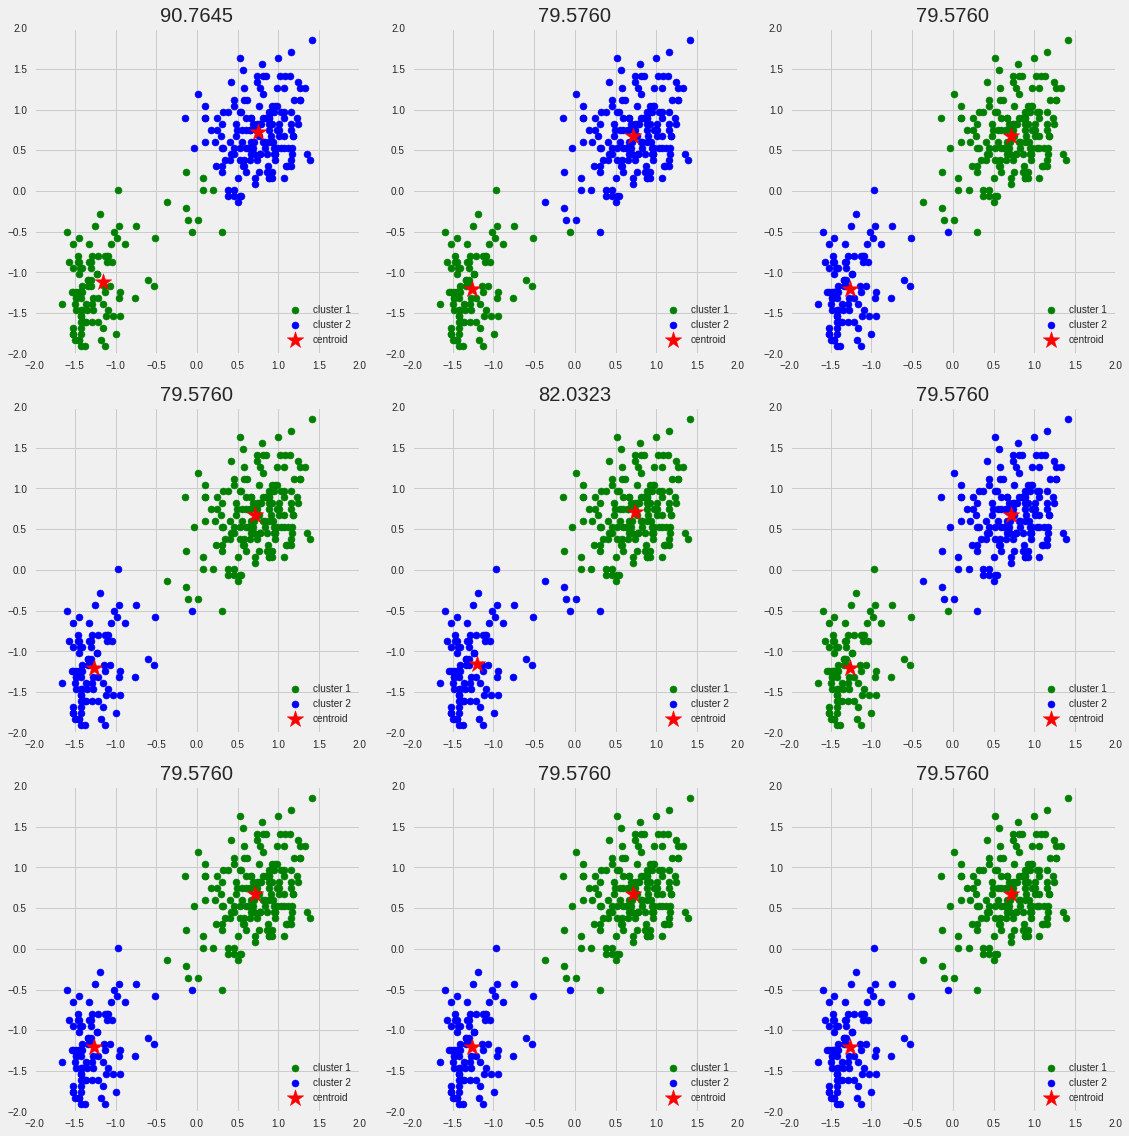

In [11]:
n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax = np.ravel(ax)
centers = []
for i in range(n_iter):
    # TO DO: Run local implementation of kmeans
    # Create the KMeans class
    # Call the funtion fit with the X_std variable
    # compute the centroids
    # Append the centroids of the current interation to the centers list. 
    km = Kmeans(n_clusters=2,
                max_iter=3,
                random_state=np.random.randint(0, 1000, size=1))
    km.fit(X_std)
    centroids = km.centroids
    centers.append(centroids)
    
    # Plot the Clusters for the 9 iterations
    ax[i].scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 1],
                  c='green', label='cluster 1')
    ax[i].scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 1],
                  c='blue', label='cluster 2')
    ax[i].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
    ax[i].set_xlim([-2, 2])
    ax[i].set_ylim([-2, 2])
    ax[i].legend(loc='lower right')
    ax[i].set_title(f'{km.error:.4f}')
    ax[i].set_aspect('equal')
plt.tight_layout();